# Introduction

## Identitas Proyek

**Nama:** Davi Sulaiman

**ID Peserta:** MC189D5Y0317  

**Judul Proyek:** Prediksi Risiko Kanker Paru-Paru Menggunakan Machine Learning

## Latar Belakang

Kanker paru-paru adalah penyebab utama kematian akibat kanker secara global, dengan lebih dari 2 juta kasus baru setiap tahun dan tingkat kelangsungan hidup yang rendah, terutama akibat keterlambatan diagnosis dan heterogenitas sel tumor. Penggunaan pendekatan berbasis Machine Learning (ML) menawarkan solusi yang potensial dalam mendeteksi kanker lebih awal secara non-invasif, efisien, dan dapat diandalkan.

Dalam studi oleh **Gao et al. (2023)**, ML terbukti bermanfaat dalam prediksi efektivitas imunoterapi untuk kanker paru-paru melalui analisis biomarker seperti **PD-L1**, **Tumor Mutation Burden (TMB)**, dan **Tumor Microenvironment (TME)**. Mereka menunjukkan bahwa pendekatan _digital biopsy_ melalui AI bisa menggantikan metode konvensional yang mahal dan invasif dalam menilai kandidat pasien untuk terapi imun.

Selanjutnya, **Dritsas dan Trigka (2022)** mengembangkan model prediksi risiko kanker paru berbasis data gejala seperti batuk kronis, sesak napas, dan riwayat merokok menggunakan algoritma Rotation Forest dan menunjukkan hasil yang sangat akurat (AUC mencapai 99,3%). Pendekatan ini menunjukkan bahwa data klinis sederhana sekalipun bisa sangat informatif bila dikombinasikan dengan metode ML yang tepat.

Sementara itu, **Li et al. (2022)** membahas penerapan ML dalam diagnosis, klasifikasi subtipe, dan prediksi prognosis kanker paru-paru dengan menggunakan data **multi-omics** (genomik, transcriptomics, proteomics) serta imaging seperti CT dan histopatologi. Mereka menekankan pentingnya integrasi data besar (big data) dengan algoritma pembelajaran mesin untuk mendukung pengambilan keputusan klinis secara presisi.

## Tujuan Proyek

Melalui proyek ini, kami membangun model klasifikasi risiko kanker paru-paru dengan menggunakan dataset klinis non-invasif yang bersifat terbuka (open dataset). Model ini bertujuan membantu identifikasi individu dengan potensi tinggi mengalami kanker paru-paru untuk mendukung deteksi dini, yang pada akhirnya diharapkan mampu meningkatkan survival rate melalui intervensi lebih awal.

## Ringkasan Dataset

Dataset yang digunakan diperoleh dari platform [Kaggle](https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset), terdiri dari 3000 observasi dan 16 fitur yang mencakup data demografis, gaya hidup, dan gejala yang berkaitan dengan kanker paru. Target prediksi adalah status `LUNG_CANCER` (Yes/No).

---

Referensi:
- Gao et al., 2023. *Artificial Intelligence and Machine Learning in Lung Cancer Immunotherapy*. J Hematol Oncol, 16(55). https://doi.org/10.1186/s13045-023-01456-y
- Dritsas & Trigka, 2022. *Lung Cancer Risk Prediction with Machine Learning Models*. BDCC, 6(139). https://doi.org/10.3390/bdcc6040139
- Li et al., 2022. *Machine Learning for Lung Cancer Diagnosis, Treatment, and Prognosis*. Genomics, Proteomics & Bioinformatics, 20(5): 850–866. https://doi.org/10.1016/j.gpb.2022.11.003


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Submission_Dicoding/

/content/drive/MyDrive/Submission_Dicoding


## Instalisasi Library

In [3]:
!pip install matplotlib seaborn pandas numpy scipy scikit-learn imbalanced-learn xgboost

## Import Library (imports.py)

In [4]:
# Visualisasi dan Analisis Data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Statistik & Preprocessing
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Model Selection & Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.datasets import make_classification

# Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Penanganan data imbalance
from imblearn.over_sampling import SMOTE

## Load Dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Submission_Dicoding/dataset.csv")

# Data Description

Dataset diambil dari Kaggle dan berisi 3000 observasi dengan 15 fitur input dan 1 target. Semua data bersifat klinis (tidak berbasis citra), cocok untuk skrining berbasis survei atau wawancara.

## Penjelasan Fitur
| Fitur                  | Deskripsi Singkat                                    |
|------------------------|------------------------------------------------------|
| GENDER                 | Jenis kelamin (M/F)                                  |
| AGE                    | Usia dalam tahun                                     |
| SMOKING                | Status merokok (1: Tidak, 2: Ya)                     |
| YELLOW_FINGERS         | Ada/tidaknya jari menguning akibat nikotin          |
| ANXIETY                | Ada/tidaknya kecemasan kronis                        |
| PEER_PRESSURE          | Terpengaruh tekanan teman                            |
| CHRONIC_DISEASE        | Riwayat penyakit kronis                              |
| FATIGUE                | Kelelahan kronis                                     |
| ALLERGY                | Riwayat alergi                                       |
| WHEEZING               | Napas berbunyi                                       |
| ALCOHOL_CONSUMING      | Konsumsi alkohol                                     |
| COUGHING               | Batuk kronis                                         |
| SHORTNESS_OF_BREATH    | Sesak napas                                          |
| SWALLOWING_DIFFICULTY  | Kesulitan menelan                                    |
| CHEST_PAIN             | Nyeri dada                                           |
| LUNG_CANCER            | Target (Yes/No)                                      |


## Explaratory Data Analysis

### Menampilkan data 5 teratas dan terbawah

In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [7]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES
2999,M,40,1,2,2,1,1,1,2,2,2,1,1,1,1,YES


### Menampilkan informasi terkait dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

### Pengecekan baris dan kolom dataset

In [9]:
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset memiliki 3000 baris dan 16 kolom.


### Menampilkan informasi tipe data pada dataset

In [10]:
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC_DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


### Pengecekan Dataset Null

In [11]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC_DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


### Pengecekan Dataset adanya duplikasi atau tidak

In [12]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  2


### Melihat describe dataset

In [13]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Preprocessing Dataset

### Menghapus data yang terduplikat

In [14]:
# Hapus duplikasi
df = df.drop_duplicates()

# Verifikasi ulang
print("Jumlah data duplikat setelah dibersihkan:", df.duplicated().sum())

Jumlah data duplikat setelah dibersihkan: 0


### Labelling dataset (ubah yang tipe data object jadi int)

In [15]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Daftar kolom kategorikal
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',
                       'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
                       'COUGHING', 'SHORTNESS_OF_BREATH',
                       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

# Lakukan encoding
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

<ipython-input-15-b63387050b91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-b63387050b91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-b63387050b91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

## Data Understanding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 2998 non-null   int64
 1   AGE                    2998 non-null   int64
 2   SMOKING                2998 non-null   int64
 3   YELLOW_FINGERS         2998 non-null   int64
 4   ANXIETY                2998 non-null   int64
 5   PEER_PRESSURE          2998 non-null   int64
 6   CHRONIC_DISEASE        2998 non-null   int64
 7   FATIGUE                2998 non-null   int64
 8   ALLERGY                2998 non-null   int64
 9   WHEEZING               2998 non-null   int64
 10  ALCOHOL_CONSUMING      2998 non-null   int64
 11  COUGHING               2998 non-null   int64
 12  SHORTNESS_OF_BREATH    2998 non-null   int64
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64
 14  CHEST_PAIN             2998 non-null   int64
 15  LUNG_CANCER            2998 non-null   int6

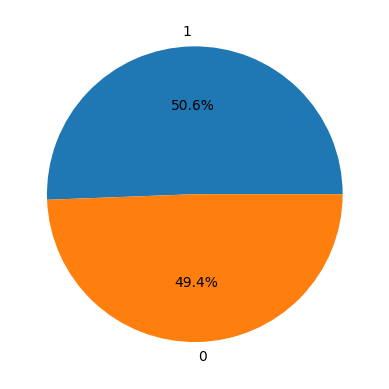

In [17]:
# Pie Chart
plt.pie(df['LUNG_CANCER'].value_counts(), labels=df['LUNG_CANCER'].value_counts().index, autopct='%1.1f%%')
plt.show()

<ipython-input-18-6adaf0d66ce4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=df, palette='hls')


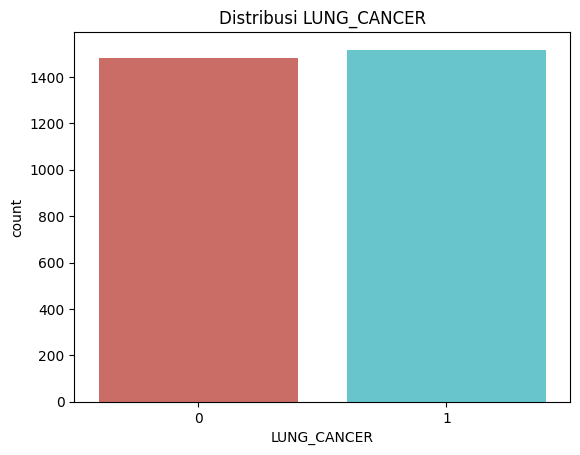

In [18]:
# Countplot
sns.countplot(x='LUNG_CANCER', data=df, palette='hls')
plt.title('Distribusi LUNG_CANCER')
plt.show()

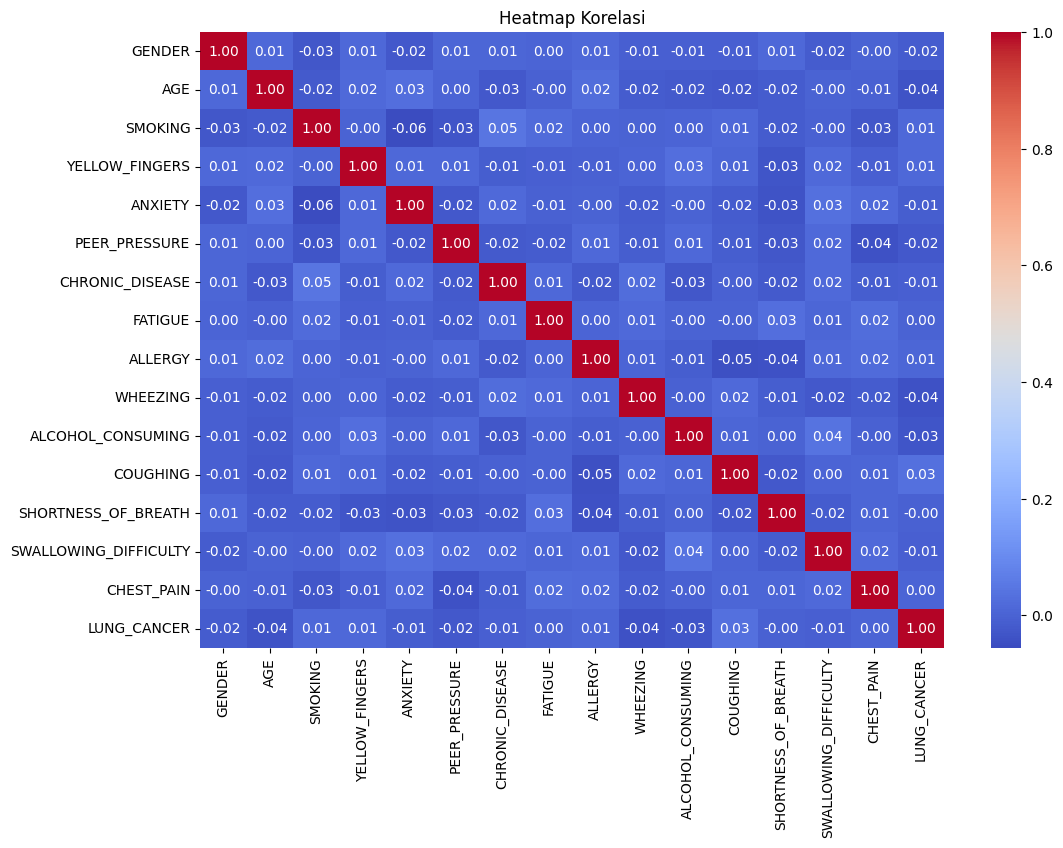

In [19]:
# Heatmap Korelasi
numerical_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

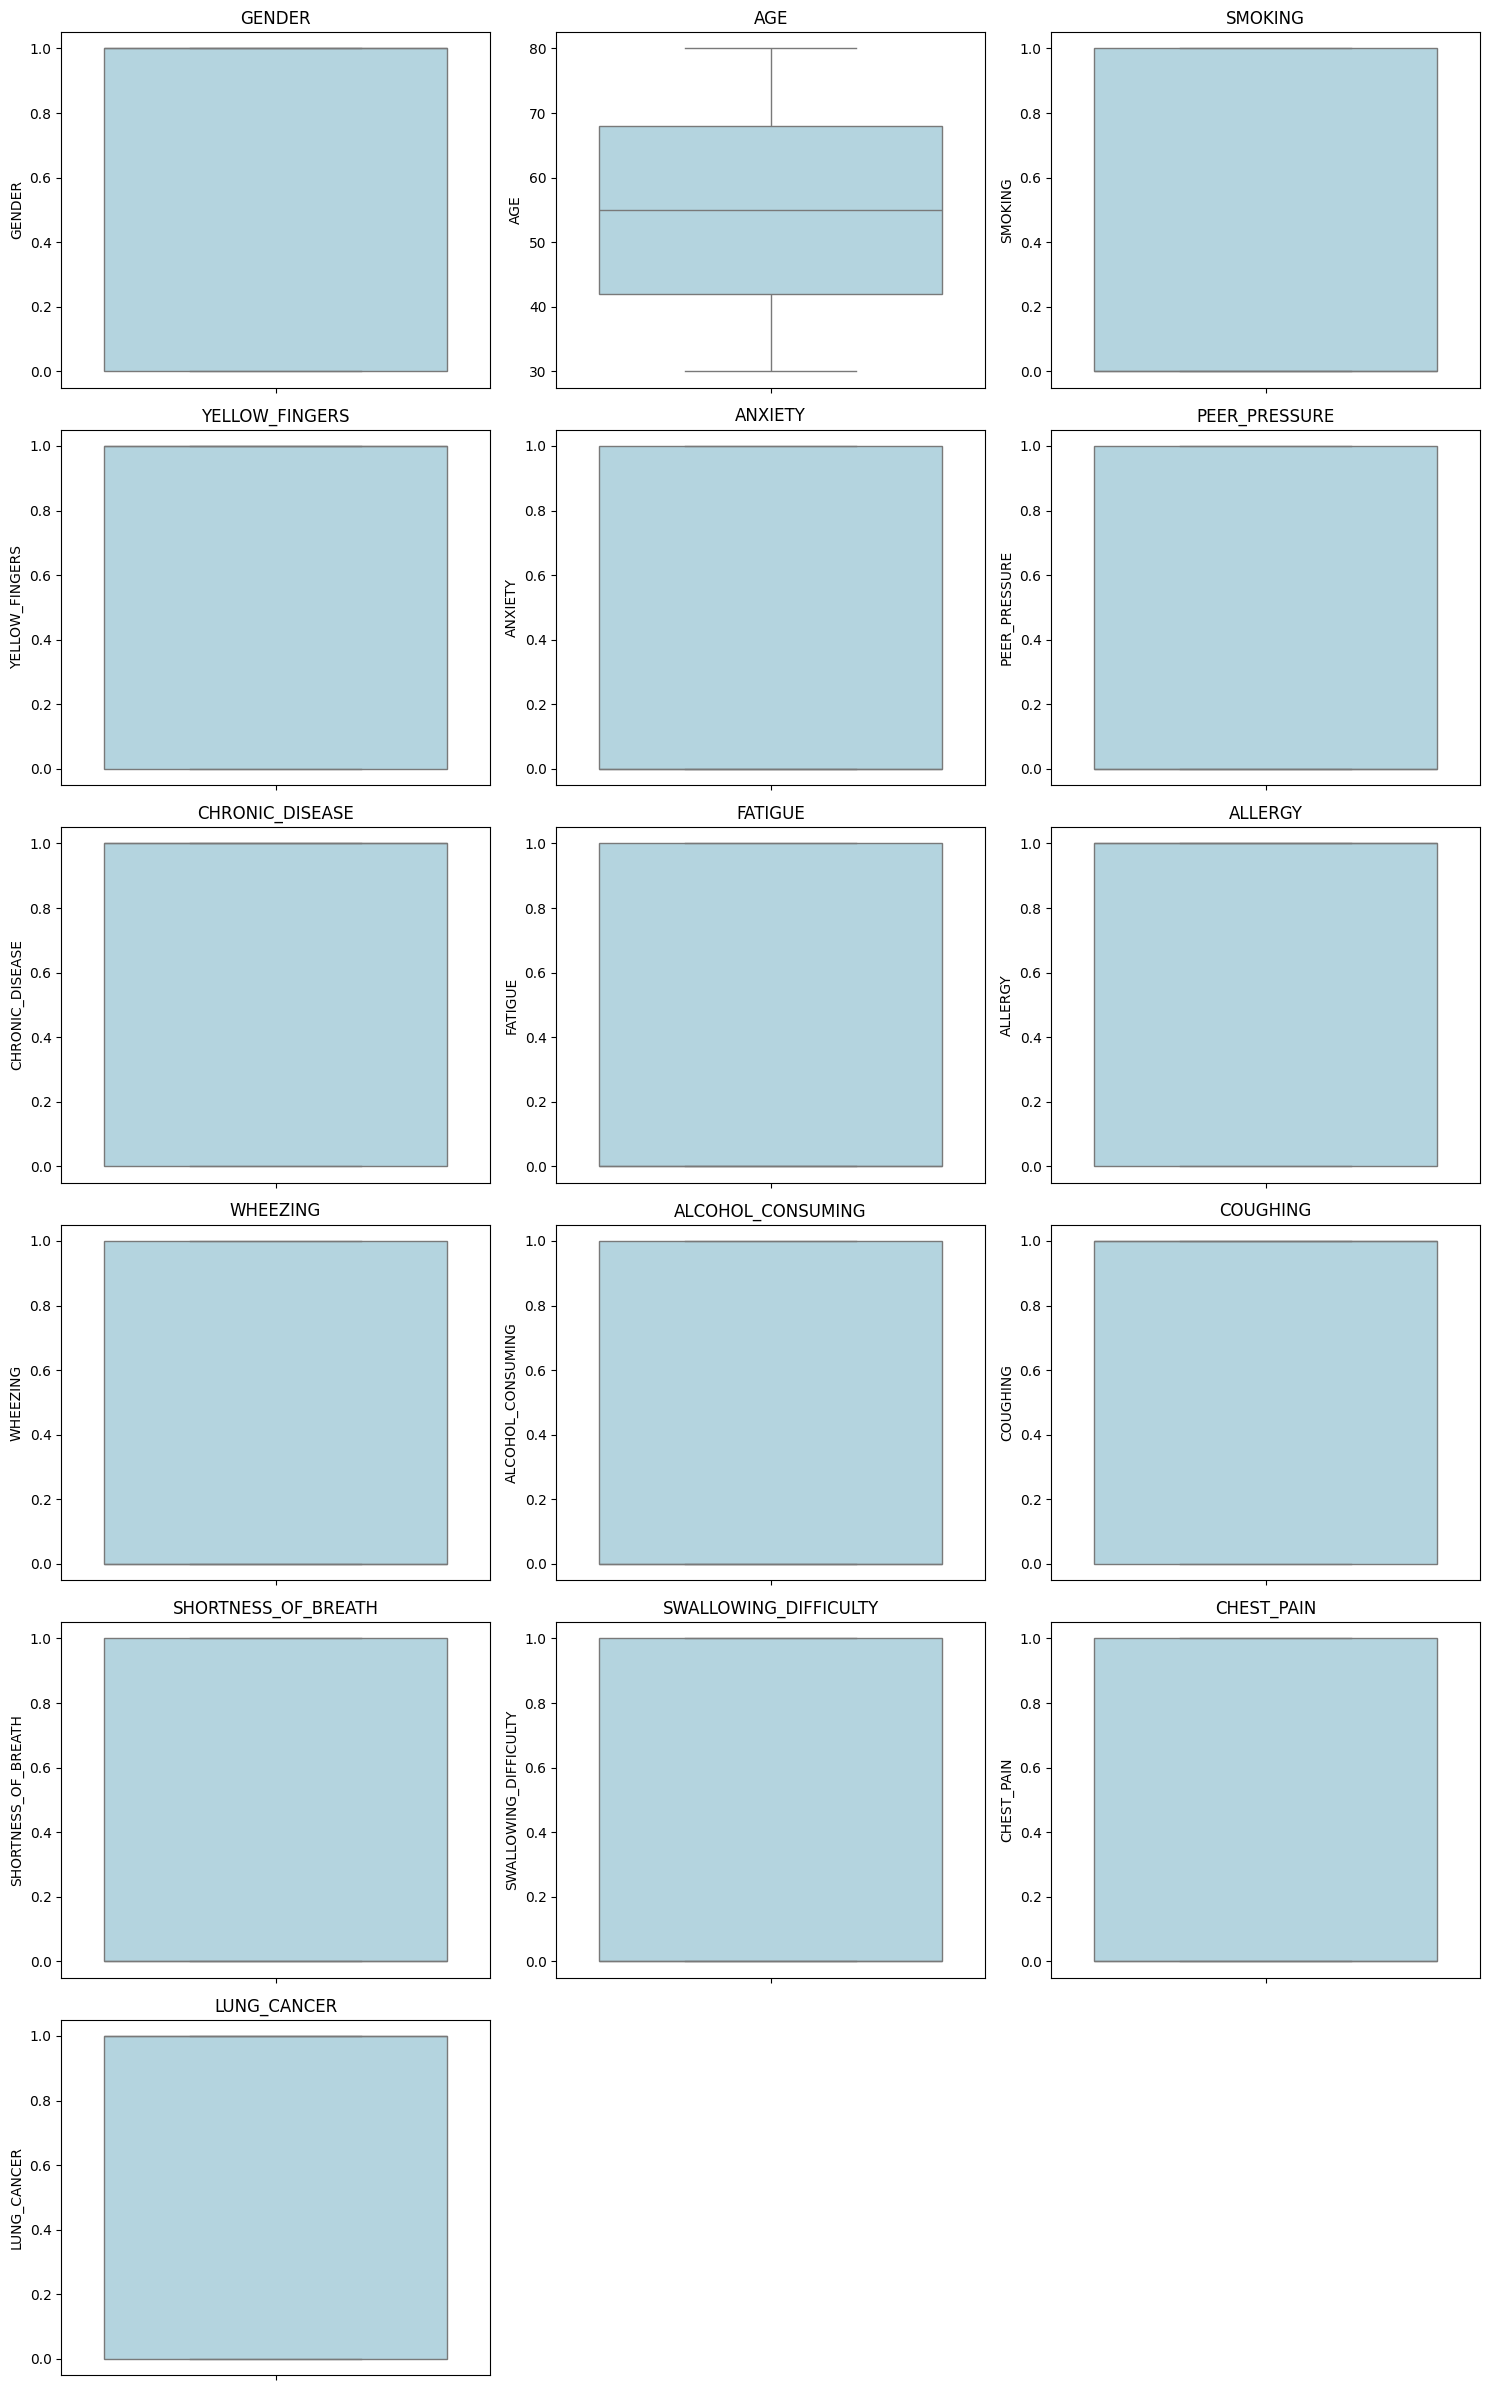

In [20]:
# Boxplot untuk semua kolom
cols_per_row = 3
columns = df.columns.tolist()
num_rows = -(-len(columns) // cols_per_row)

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, cols_per_row, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col}')
    plt.xlabel("")
plt.tight_layout()
plt.show()

## Modelling

### Data Preparation (Preprocessing Dataset)




#### Split Dataset

In [21]:
X, y = make_classification(n_samples=2998, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Total data: {len(X)}, Train: {len(X_train)}, Test: {len(X_test)}')

Total data: 2998, Train: 2398, Test: 600


#### Standarisasi Dataset

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Models Training

#### Inisialisasi Model

In [23]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

#### Melatih Model

In [24]:
# Melatih model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f" {name} telah dilatih.")

 Logistic Regression telah dilatih.
 Random Forest telah dilatih.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:53:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost telah dilatih.
 K-Nearest Neighbors telah dilatih.
 Decision Tree telah dilatih.
 Gradient Boosting telah dilatih.
 AdaBoost telah dilatih.


#### Evaluasi Model

In [25]:
# Evaluasi model
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f" {name} selesai dievaluasi dengan akurasi: {accuracy:.4f}")

 Logistic Regression selesai dievaluasi dengan akurasi: 0.9700
 Random Forest selesai dievaluasi dengan akurasi: 0.9817
 XGBoost selesai dievaluasi dengan akurasi: 0.9783
 K-Nearest Neighbors selesai dievaluasi dengan akurasi: 0.9750
 Decision Tree selesai dievaluasi dengan akurasi: 0.9683
 Gradient Boosting selesai dievaluasi dengan akurasi: 0.9800
 AdaBoost selesai dievaluasi dengan akurasi: 0.9750


In [26]:
# Tampilkan hasil evaluasi
for model, metrics in results.items():
    print(f"\n Model: {model}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value:.4f}")
    print("-" * 50)


 Model: Logistic Regression
  Accuracy: 0.9700
  Precision: 0.9700
  Recall: 0.9700
  F1-Score: 0.9700
--------------------------------------------------

 Model: Random Forest
  Accuracy: 0.9817
  Precision: 0.9818
  Recall: 0.9817
  F1-Score: 0.9817
--------------------------------------------------

 Model: XGBoost
  Accuracy: 0.9783
  Precision: 0.9784
  Recall: 0.9783
  F1-Score: 0.9783
--------------------------------------------------

 Model: K-Nearest Neighbors
  Accuracy: 0.9750
  Precision: 0.9750
  Recall: 0.9750
  F1-Score: 0.9750
--------------------------------------------------

 Model: Decision Tree
  Accuracy: 0.9683
  Precision: 0.9688
  Recall: 0.9683
  F1-Score: 0.9684
--------------------------------------------------

 Model: Gradient Boosting
  Accuracy: 0.9800
  Precision: 0.9802
  Recall: 0.9800
  F1-Score: 0.9800
--------------------------------------------------

 Model: AdaBoost
  Accuracy: 0.9750
  Precision: 0.9750
  Recall: 0.9750
  F1-Score: 0.9750
---

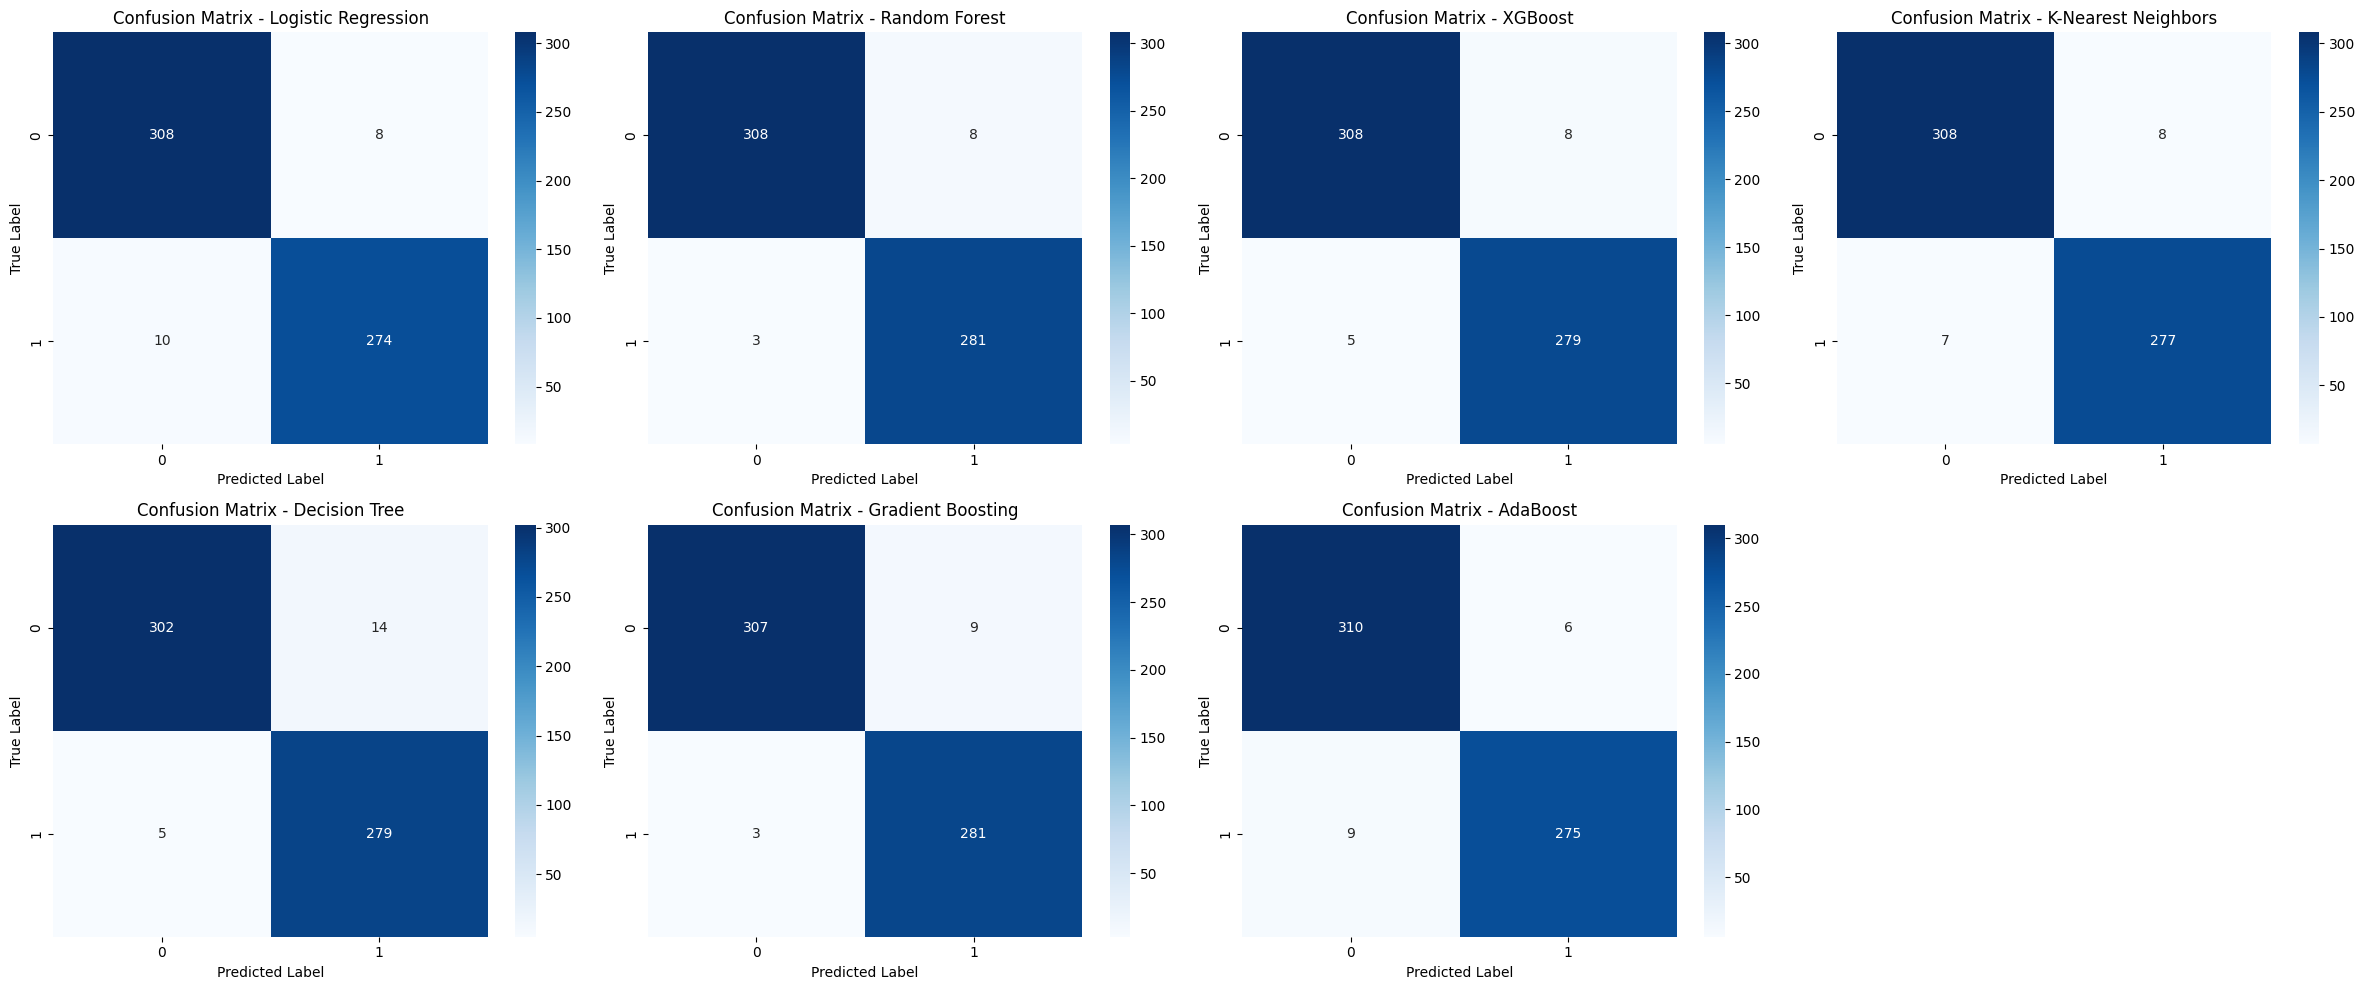

In [30]:
# Jumlah total model
model_names = list(results.keys())
n_models = len(model_names)

# Buat subplot: 4 kolom per baris
cols = 4
rows = (n_models + cols - 1) // cols  # pembulatan ke atas

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))

# Flatten axes untuk akses mudah jika hanya 1 baris
axes = axes.flatten()

# Plot masing-masing confusion matrix
for idx, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)),
                ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

# Kosongkan subplot jika tidak terpakai (jika model tidak kelipatan 3)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-28-841d6dd83960>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=accuracies, y=model_names, palette="coolwarm")


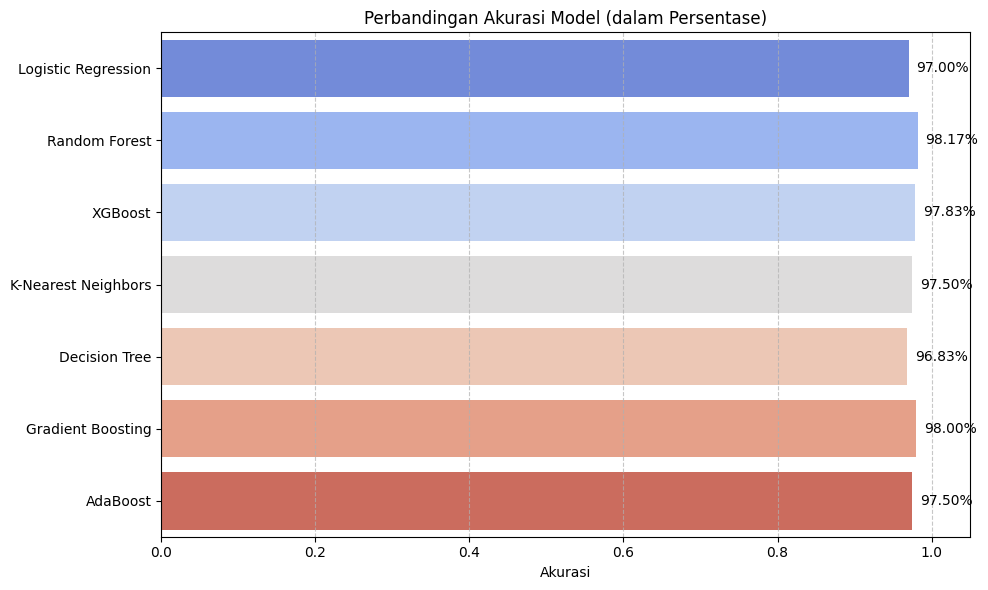

In [28]:
# Ambil nama model dan nilai akurasinya
model_names = list(results.keys())
accuracies = [metrics["Accuracy"] for metrics in results.values()]
accuracy_percent = [f"{acc*100:.2f}%" for acc in accuracies]

# Buat plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accuracies, y=model_names, palette="coolwarm")

# Tambahkan label persentase di ujung bar
for i, (bar, percent) in enumerate(zip(bars.patches, accuracy_percent)):
    plt.text(
        bar.get_width() + 0.01,  # Posisi x: sedikit di luar bar
        bar.get_y() + bar.get_height() / 2,  # Posisi y: tengah-tengah bar
        percent,
        va='center'
    )

# Pengaturan tambahan
plt.xlabel("Akurasi")
plt.title("Perbandingan Akurasi Model (dalam Persentase)")
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 🔍 **Evaluasi Model Klasifikasi Kanker Paru-Paru**

### 1. **Logistic Regression**

* **Akurasi**: 97.00%
* **Precision / Recall / F1-Score**: Semuanya 97.00%
* ✅ **Stabil dan efisien**, cocok sebagai baseline model dengan performa cukup tinggi dan konsisten.

### 2. **Random Forest**

* **Akurasi**: **98.17%**
* **Precision**: 98.18%
* **Recall & F1-Score**: 98.17%
* 🥇 **Model dengan performa terbaik**, sangat kuat dalam generalisasi dan menangani kompleksitas fitur tanpa overfitting berlebih.

### 3. **XGBoost**

* **Akurasi**: 97.83%
* **Precision**: 97.84%
* **Recall & F1-Score**: 97.83%
* ⚡ Performa tinggi dan efisien dalam menangani outlier dan fitur non-linear, mendekati Random Forest.

### 4. **K-Nearest Neighbors (KNN)**

* **Akurasi / Precision / Recall / F1-Score**: 97.50%
* 🔄 Model sederhana dan efektif, cocok untuk data yang tidak terlalu besar, meskipun sensitif terhadap pemilihan parameter *k*.

### 5. **Decision Tree**

* **Akurasi**: 96.83%
* **Precision**: 96.88%
* **Recall**: 96.83%
* **F1-Score**: 96.84%
* 📉 Kinerja terendah dibanding model lain karena sifatnya yang mudah overfitting tanpa metode pemangkasan.

### 6. **Gradient Boosting**

* **Akurasi**: 98.00%
* **Precision**: 98.02%
* **Recall & F1-Score**: 98.00%
* 🏆 Salah satu model dengan **stabilitas dan presisi tinggi**, unggul dalam menangani pola kompleks.

### 7. **AdaBoost**

* **Akurasi / Precision / Recall / F1-Score**: 97.50%
* ✳️ Model boosting klasik yang memberi bobot pada data sulit. Efektif namun sedikit kalah dari Gradient Boosting dan Random Forest.

---

## 📊 **Perbandingan Singkat**

| Model               | Accuracy   | Precision  | Recall     | F1-Score   |
| ------------------- | ---------- | ---------- | ---------- | ---------- |
| Logistic Regression | 0.9700     | 0.9700     | 0.9700     | 0.9700     |
| Random Forest       | **0.9817** | **0.9818** | **0.9817** | **0.9817** |
| XGBoost             | 0.9783     | 0.9784     | 0.9783     | 0.9783     |
| KNN                 | 0.9750     | 0.9750     | 0.9750     | 0.9750     |
| Decision Tree       | 0.9683     | 0.9688     | 0.9683     | 0.9684     |
| Gradient Boosting   | 0.9800     | 0.9802     | 0.9800     | 0.9800     |
| AdaBoost            | 0.9750     | 0.9750     | 0.9750     | 0.9750     |

---

## 🎯 **Kesimpulan**

* **Random Forest** memberikan performa terbaik secara keseluruhan.
* **Gradient Boosting** dan **XGBoost** juga menunjukkan hasil luar biasa dan cocok untuk deployment model klasifikasi medis.
* **Logistic Regression** tetap relevan karena kesederhanaannya dan interpretabilitas tinggi, meskipun tidak setinggi ensemble method.



# References

- Gao et al., 2023. *Artificial Intelligence and Machine Learning in Lung Cancer Immunotherapy*. Journal of Hematology & Oncology, 16(55). [https://doi.org/10.1186/s13045-023-01456-y](https://doi.org/10.1186/s13045-023-01456-y)  
- Dritsas & Trigka, 2022. *Lung Cancer Risk Prediction with Machine Learning Models*. BDCC, 6(139). [https://doi.org/10.3390/bdcc6040139](https://doi.org/10.3390/bdcc6040139)  
- Li et al., 2022. *Machine Learning for Lung Cancer Diagnosis, Treatment, and Prognosis*. Genomics, Proteomics & Bioinformatics, 20(5): 850–866. [https://doi.org/10.1016/j.gpb.2022.11.003](https://doi.org/10.1016/j.gpb.2022.11.003)
